In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [6]:
# Descriptive statistics of the data set accessed.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
for i in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    df[i].replace(0,np.nan,inplace=True)
    df[i].fillna(df[i].mean(),inplace=True)
    

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
x=df.iloc[:,1:-1]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [13]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
#seperate Data
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [16]:
xtrain

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
118,97.0,60.0,23.00000,155.548223,28.2,0.443,22
205,111.0,72.0,28.00000,155.548223,23.9,0.407,27
506,180.0,90.0,26.00000,90.000000,36.5,0.314,35
587,103.0,66.0,29.15342,155.548223,24.3,0.249,29
34,122.0,78.0,31.00000,155.548223,27.6,0.512,45
...,...,...,...,...,...,...,...
645,157.0,74.0,35.00000,440.000000,39.4,0.134,30
715,187.0,50.0,33.00000,392.000000,33.9,0.826,34
72,126.0,90.0,29.15342,155.548223,43.4,0.583,42
235,171.0,72.0,29.15342,155.548223,43.6,0.479,26


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg=LogisticRegression()

In [19]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
ypred=logreg.predict(xtest)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [23]:
logreg=LogisticRegression(solver='saga')

In [24]:
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='saga')

In [25]:
ypred=logreg.predict(xtest)

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       123
           1       0.68      0.38      0.49        69

    accuracy                           0.71       192
   macro avg       0.70      0.64      0.64       192
weighted avg       0.71      0.71      0.69       192



In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
xtrain=sc.fit_transform(xtrain)

In [30]:
xtest=sc.fit_transform(xtest)

In [31]:
logreg=LogisticRegression(solver='saga')

In [32]:
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='saga')

In [33]:
ypred=logreg.predict(xtest)

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       123
           1       0.74      0.57      0.64        69

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



In [35]:
print (f'Actual Values -: {ytest[:25].values}')
print (f'Predicated Values -: {ypred[:25]}')

Actual Values -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicated Values -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


array([[-0.82444694, -0.97523127, -0.67246728, ..., -0.57603442,
        -0.07502996, -0.94438203],
       [-0.35655251, -0.02533405, -0.09648881, ..., -1.20790198,
        -0.18379061, -0.5204699 ],
       [ 1.94949858,  1.39951178, -0.3268802 , ...,  0.64361691,
        -0.46475564,  0.15778952],
       ...,
       [ 0.14476294,  1.39951178,  0.03638016, ...,  1.65754392,
         0.34792815,  0.7512665 ],
       [ 1.64870931, -0.02533405,  0.03638016, ...,  1.68693311,
         0.0337307 , -0.60525232],
       [-0.65734178,  0.29129836,  0.94027242, ...,  0.11461151,
         0.59566076,  1.09039621]])

In [42]:
logreg.predict_proba(xtest)

array([[0.6168834 , 0.3831166 ],
       [0.73544586, 0.26455414],
       [0.90750719, 0.09249281],
       [0.92453627, 0.07546373],
       [0.752828  , 0.247172  ],
       [0.69665889, 0.30334111],
       [0.69766122, 0.30233878],
       [0.89978623, 0.10021377],
       [0.80681634, 0.19318366],
       [0.74277761, 0.25722239],
       [0.64288912, 0.35711088],
       [0.90267924, 0.09732076],
       [0.01604789, 0.98395211],
       [0.38153723, 0.61846277],
       [0.67333898, 0.32666102],
       [0.38448538, 0.61551462],
       [0.7182269 , 0.2817731 ],
       [0.71299153, 0.28700847],
       [0.96032305, 0.03967695],
       [0.89521675, 0.10478325],
       [0.60542449, 0.39457551],
       [0.89387155, 0.10612845],
       [0.14496356, 0.85503644],
       [0.84532294, 0.15467706],
       [0.92238128, 0.07761872],
       [0.60368762, 0.39631238],
       [0.75973993, 0.24026007],
       [0.43739798, 0.56260202],
       [0.88963281, 0.11036719],
       [0.64881077, 0.35118923],
       [0.

In [43]:
ypredpro=logreg.predict_proba(xtest)[:,1]

In [46]:
from sklearn.preprocessing import binarize


In [55]:
 binarize ([ypredpro],threshold=0.30)[0]

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [56]:
print(f"Actual Values -: {ytest[:25].values}")
print(f"Predicted Values -: {ypred[:25]}")

Actual Values -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [58]:
from sklearn.metrics import roc_curve


In [60]:
fpr,tpr,thres=roc_curve(ytest,ypredpro)

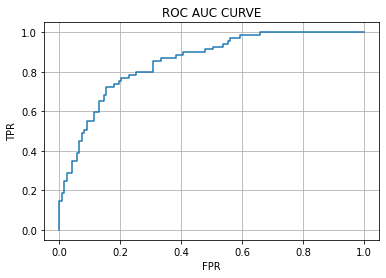

In [62]:
plt.title("ROC AUC CURVE")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.show()